# SBM overlapping
This algorithm works for different types of networks.

We used this command on the directed weighted network:


    
    """
    class graph_tool.inference.OverlapBlockState(g, b=None, 
    B=None, recs=[], rec_types=[], rec_params=[], clabel=None, 
    pclabel=None, deg_corr=True, allow_empty=False, max_BE=1000,
                                            **kwargs)
    """
   state = minimize_blockmodel_dl(g, state_args=dict(recs=[g.ep.weight],rec_types=["discrete-poisson"]))
    
    b = state.get_blocks()
    
    s = OverlapBlockState(g, b=b, recs=[g.ep.weight],rec_types=["discrete-poisson"]) 

In [117]:
import os
from graph_tool.all import *
import codecs
from collections import defaultdict, OrderedDict
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 
from igraph import *
from scipy.stats.stats import pearsonr
from scipy import stats
import seaborn as sns
import pandas as pd
import math
import json
plt.style.use('seaborn-white')
sns.set(font_scale=2) 
sns.set_style("white")

In [129]:
WORKING_FOLDER = '../../../DATA/FIN/SBM_overlapping'
os.chdir(WORKING_FOLDER)
f_in_graph = 'mention_graph_weights.dat'
# this is a .tree file
f_in_output_comm = 'SBM_overlapping_clusters_node_names_1600'

# Read in data

In [130]:
# returns a dict with node ids per community in each value
# dict keys are just community ids in returned order 
def read_output():  
    input_file = codecs.open(f_in_output_comm, 'r', encoding='utf8')
    output = defaultdict(list)
    num_COMM = 0
    for line in input_file:
        line = line.split()
        output[num_COMM] = line
        num_COMM += 1
         
    return output
read_output()

defaultdict(list,
            {0: [u'7471',
              u'5660',
              u'15408',
              u'24833',
              u'7593',
              u'14431',
              u'21254',
              u'12846',
              u'21246',
              u'26557',
              u'10342',
              u'6553',
              u'25377',
              u'22073',
              u'2163',
              u'10152',
              u'4939',
              u'2865',
              u'28973',
              u'873',
              u'24791',
              u'10658',
              u'19633',
              u'1822',
              u'24572',
              u'3487',
              u'20423',
              u'953',
              u'16832',
              u'4072',
              u'9534',
              u'5001',
              u'6863',
              u'20554',
              u'19153',
              u'15132',
              u'6042',
              u'11923',
              u'2329',
              u'10322',
              u'5401',
              u

In [131]:
def read_in_top_communities(sizeN):
    ordered_communities = OrderedDict(sorted(read_output().items(), key=lambda t:len(t[1]), reverse=True))
    top_communities = OrderedDict(x for x in ordered_communities.items() if len(x[1])>sizeN)
    return top_communities

In [132]:
# returns a set of communities in which each node belongs to
def find_nodes_COMM():
    nodes_COMM = defaultdict(list)
    output = read_output()
    for comm in output.keys():
        for node in output[comm]:
            nodes_COMM[node].append(comm)
            
    for node in nodes_COMM:
            nodes_COMM[node] = list(set(nodes_COMM[node]))
            
    return nodes_COMM

In [133]:
# a helper function to show us info when print info is true
# otherwise returns only the list of community sizes
def num_and_sizes_COMM(print_info=False):
    COMM_sizes = []
    ALL_users = defaultdict(int)
    infomap_COMM = read_output()
    num_COMM = len(infomap_COMM.keys())
    for comm in infomap_COMM:
        COMM_sizes.append(len(infomap_COMM[comm]))
        for el in infomap_COMM[comm]:
            ALL_users[el] = 1
    if print_info:
        print 'Infomap has output: %d COMM ' % (num_COMM)
        print 'Their sizes in increasing order:'
        print sorted(COMM_sizes)
        print 'Total number of users in COMM:'
        print len(ALL_users.keys())
        print 'Total size of COMM:'
        print sum(COMM_sizes)
    return COMM_sizes
num_and_sizes_COMM(print_info=True)

Infomap has output: 1600 COMM 
Their sizes in increasing order:
[91, 91, 91, 94, 94, 94, 95, 95, 95, 96, 97, 97, 97, 98, 98, 98, 98, 99, 100, 100, 100, 100, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 102, 102, 102, 102, 102, 102, 102, 102, 102, 102, 102, 103, 103, 103, 103, 103, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 108, 108, 108, 108, 108, 108, 108, 108, 108, 108, 108, 108, 108, 108, 108, 108, 108, 108, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 111, 111, 111, 111, 111, 111, 111, 111, 111, 111, 111, 111, 111, 111, 111, 111, 111, 111, 111

[113,
 129,
 149,
 112,
 118,
 133,
 152,
 110,
 121,
 142,
 134,
 124,
 113,
 123,
 121,
 124,
 128,
 140,
 130,
 134,
 131,
 120,
 115,
 124,
 141,
 123,
 137,
 139,
 118,
 122,
 134,
 125,
 125,
 113,
 117,
 137,
 118,
 119,
 102,
 114,
 121,
 133,
 120,
 130,
 119,
 139,
 121,
 117,
 123,
 129,
 122,
 139,
 114,
 119,
 100,
 143,
 136,
 109,
 125,
 147,
 110,
 148,
 126,
 111,
 135,
 147,
 132,
 121,
 126,
 112,
 121,
 126,
 126,
 133,
 115,
 128,
 131,
 138,
 108,
 127,
 136,
 126,
 132,
 120,
 135,
 123,
 109,
 120,
 139,
 111,
 101,
 136,
 116,
 137,
 123,
 136,
 118,
 123,
 125,
 128,
 124,
 122,
 118,
 111,
 123,
 125,
 129,
 104,
 118,
 125,
 121,
 114,
 117,
 126,
 130,
 129,
 120,
 116,
 122,
 129,
 113,
 136,
 132,
 128,
 127,
 116,
 112,
 113,
 149,
 122,
 132,
 105,
 109,
 140,
 128,
 119,
 133,
 125,
 115,
 132,
 118,
 124,
 118,
 143,
 141,
 113,
 117,
 119,
 129,
 123,
 136,
 122,
 139,
 121,
 118,
 110,
 114,
 130,
 119,
 122,
 132,
 122,
 122,
 141,
 140,
 127,
 128

In [134]:
# returns the node membership for each node
# i.e., in how many communities it participates
def find_nodes_in_more_COMM():
    nodes_num_COMM = defaultdict(int)
    infomap_COMM = read_output()
    for comm in infomap_COMM:
        for node in infomap_COMM[comm]:
            nodes_num_COMM[int(node)] += 1
    sorted_nodes_num_COMM = OrderedDict(sorted(nodes_num_COMM.items(), key=lambda t:t[1], reverse=True))
    print max(sorted_nodes_num_COMM.values())
    return sorted_nodes_num_COMM

In [135]:
find_nodes_in_more_COMM()

840


OrderedDict([(5660, 840),
             (20181, 357),
             (10152, 217),
             (24833, 213),
             (22458, 204),
             (12982, 196),
             (5881, 184),
             (13208, 178),
             (2309, 155),
             (3384, 129),
             (16191, 122),
             (14516, 113),
             (23597, 113),
             (21417, 112),
             (2022, 108),
             (956, 104),
             (25860, 104),
             (12408, 102),
             (15270, 101),
             (8093, 100),
             (22430, 98),
             (29258, 97),
             (1022, 93),
             (7747, 93),
             (13770, 93),
             (475, 92),
             (20074, 91),
             (13188, 89),
             (11649, 87),
             (18675, 87),
             (21234, 87),
             (6987, 86),
             (6654, 84),
             (17008, 84),
             (22216, 84),
             (26507, 84),
             (15949, 83),
             (18305, 83),
      

# Let us visualize the overalpping community structure

In [136]:
# plots complementary CDF for the membership per node
# in log-log scale
def plot_ccdf_node_comm_membership():
    nodes_num_COMM = find_nodes_in_more_COMM()
    data = np.array(nodes_num_COMM.values())
    sorted_data = np.sort(data)
    yvals=1-np.arange(len(sorted_data))/float(len(sorted_data)-1)
    plt.plot(sorted_data,yvals,color='r')
    plt.yscale('log')
    plt.ylabel('complementary CDF')
    plt.xscale('log')
    plt.xlabel('comm memberships')
    plt.savefig('ccdf_memberships.jpg')
    plt.show()

840


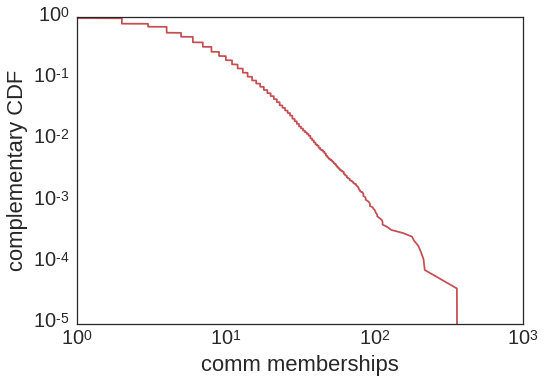

In [137]:
plot_ccdf_node_comm_membership()

In [138]:
# plots complementary CDF for the comm sizes
# in log-log scale
def plot_ccdf_comm_sizes():
    COMM_sizes = num_and_sizes_COMM()
    data = np.array(COMM_sizes)
    sorted_data = np.sort(data)
    yvals=1-np.arange(len(sorted_data))/float(len(sorted_data)-1)
    plt.plot(sorted_data,yvals,color='r')
    plt.yscale('log')
    plt.ylabel('complementary CDF')
    plt.xscale('log')
    plt.xlabel('community size')
    plt.savefig('ccdf_comm_sizes.jpg')
    plt.show()

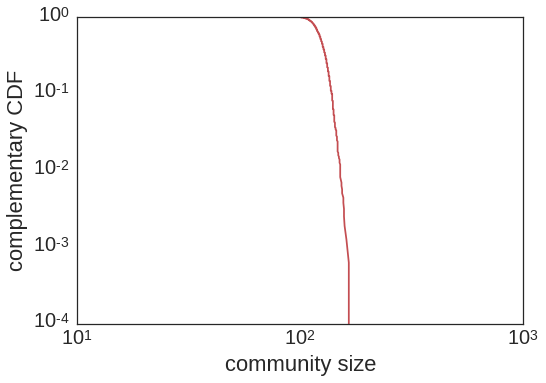

In [139]:
plot_ccdf_comm_sizes()

# Now we add SR values and graph into the story
We want to see does community size correlate with average SR

In [140]:
# reads in the graph using igraph and Ncol format, i.e., edge list
# with weights being the SR on the edges
def read_in_SR_graph():
    #G = Graph.Read_Ncol('undirected_mention_graph_with_SR.csv', directed=False, weights=True)
    #G = read("test", format="ncol", directed=False, weights=True)
    G = Graph.Read_Ncol('directed_mention_graph_with_SR_NCOL_edgelist', weights=True, names=True)
    print G.summary()
    #for edge in G.es():
    #    print edge.tuple[0], edge.tuple[1], edge["weight"]
    return G

Next function uses igraph to first find a subgraph induced by the community
and to then calculate average SR on its edges. It is relatively fast given that
other implementation I took (iterating through nodes) were really slow.

In [141]:
# find average SR between the connected nodes
# in the subgraph of G induced by the nodes
def find_avg_SR(G, nodes):
    node_SR_list = []
    node_indices = []
    cnt = 0
    for el in nodes:
        try:
            n = G.vs.select(name = str(el))[0]
        except IndexError:
            cnt += 1
            #print el
            continue
        n = n.index
        node_indices.append(n)
    #print 'I didnt find SR for %d nodes ', cnt
    edges = G.es.select(_within = node_indices)
    for e in edges:
        w = e['weight']
        node_SR_list.append(w)
    avg_SR = np.mean(np.array(node_SR_list))
    std_SR = np.std(np.array(node_SR_list))
    return (avg_SR, std_SR)      

We now combine the BigClam output and previous function
to find avergage SR per community

In [142]:
def avg_SR_per_COMM_size():
    output = read_output()
    G = read_in_SR_graph()
    size_vs_SR = defaultdict(int)
    for comm_nodes in output.values():
        size_vs_SR[len(comm_nodes)] = find_avg_SR(G, comm_nodes)
    sorted_size_vs_SR = OrderedDict(sorted(size_vs_SR.items(), key=lambda t:t[0], reverse=True))
    return size_vs_SR

We now plot the distribution. There is *no* correlation.

In [143]:
def plot_avg_SR_per_COMM_size():
    size_vs_SR = avg_SR_per_COMM_size()
    x = np.array(size_vs_SR.keys())
    y = np.array([s[0] for s in size_vs_SR.values()])
    e = np.array([s[1] for s in size_vs_SR.values()])
    print 'Corrcoef',  pearsonr(x, y)
    plt.errorbar(x,y,e,linestyle="-",marker='*',color='maroon',label='mean SR per comm')
    #plt.yscale('log', nonposy='clip')
    plt.xlabel('comm size')
    plt.ylabel('mean SR')
    plt.legend(loc='best',frameon=False)
    plt.show()

In [144]:
#plot_avg_SR_per_COMM_size()

In [47]:
def scatterplot_avg_SR_per_COMM_size():
    size_vs_SR = avg_SR_per_COMM_size()
    x = np.array(size_vs_SR.keys())
    y = np.array([s[0] for s in size_vs_SR.values()])
    e = np.array([s[1] for s in size_vs_SR.values()])
    print 'Corrcoef',  pearsonr(x, y)
    plt.scatter(x,y, label='mean SR per comm')
    plt.xlabel('comm size')
    plt.ylabel('mean SR')
    #plt.xscale('log')
    #plt.legend(loc='best',frameon=False)
    plt.show()

IGRAPH DNW- 26717 99910 -- 
+ attr: name (v), weight (e)
Corrcoef (-0.16814850790193447, 0.16409513628405117)


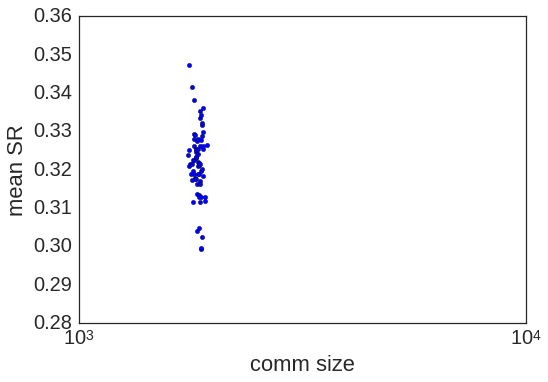

In [38]:
scatterplot_avg_SR_per_COMM_size()

In [145]:
def read_sem_capital(f_name='user_entities.tab', tname='entities'):
    f = open(f_name, "r")
    cap = defaultdict(int)
    cnt = 0
    for line in f:
        if tname == 'sentiment':
            (vid, vn, val) = line.split('\t')
            val = float(val)
        else:
            (vid, val) = line.split('\t')
            val = float(val)
        cap[vid] = val
        cnt += 1
    return cap

In [146]:
def find_avg_SEM_CAP(sem_cap, comm_nodes):
    s = []
    for node in comm_nodes:
        s.append(sem_cap[str(node)])
    s_mean = np.mean(np.array(s))
    s_std = np.std(np.array(s))
    return (s_mean, s_std)

In [147]:
def avg_SEM_CAP_per_COMM_size():
    output = read_output()
    sem_cap = read_sem_capital()
    size_vs_SEM_CAP = defaultdict(int)
    for comm_nodes in output.values():
        size_vs_SEM_CAP[len(comm_nodes)] = find_avg_SEM_CAP(sem_cap, comm_nodes)
    sorted_size_vs_SEM_CAP = OrderedDict(sorted(size_vs_SEM_CAP.items(), key=lambda t:t[0], reverse=True))
    return size_vs_SEM_CAP

In [148]:
def scatterplot_avg_SEM_CAP_per_COMM_size():
    size_vs_SEM_CAP = avg_SEM_CAP_per_COMM_size()
    x = np.array(size_vs_SEM_CAP.keys())
    y = np.array([s[0] for s in size_vs_SEM_CAP.values()])
    e = np.array([s[1] for s in size_vs_SEM_CAP.values()])
    print 'Corrcoef',  pearsonr(x, y)
    plt.scatter(x,y)
    plt.xlabel('comm size')
    plt.ylabel('mean sem cap')
    #plt.xscale('log')
    #plt.legend(loc='best',frameon=False)
    plt.show()

Corrcoef (-0.0076314143999914501, 0.95075044071282411)


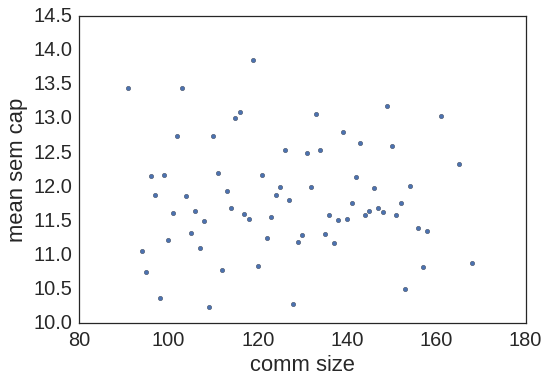

In [149]:
scatterplot_avg_SEM_CAP_per_COMM_size()

# Community membership i.e., pluralistic homophily

In [155]:
N_overlap_comm = 30

In [156]:
def how_many_nodes_with_pluralistic_level():
    node_comm_membership = find_nodes_in_more_COMM()
    pluralisic_classes_sizes = defaultdict(int)
    for node in node_comm_membership:
        pluralisic_classes_sizes[node_comm_membership[node]] += 1
    return pluralisic_classes_sizes
#how_many_nodes_with_pluralistic_level()       

In [157]:
# how similar is the node to his neighbors
def find_avg_neighborhood_SR_per_node_COMM_membership():
    node_comm_membership = find_nodes_in_more_COMM()
    G = read_in_SR_graph()
    res = defaultdict(list)
    for node in node_comm_membership:
        n = G.vs.select(name = str(node))
        nCOMM = node_comm_membership[node] if node_comm_membership[node] <= N_overlap_comm else N_overlap_comm
        try:
            total_SR = G.strength(n[0].index, weights='weight')
        except IndexError:
            continue
        total_neighbors = G.degree(n[0].index)
        meanSR =  total_SR / float(total_neighbors)
        res[nCOMM].append(meanSR)
    res_mean = defaultdict(float)
    res_stdev = defaultdict(float)
    for COMM in res:
        res_mean[COMM] = np.mean(np.array(res[COMM]))
        res_stdev[COMM] = np.std(np.array(res[COMM]))
    return res_mean, res_stdev

In [158]:
def plot_avg_neighborhood_SR_vs_COMM_membership():
    
    fig, ax1 = plt.subplots()
    ax1.set_xlabel('user comm membership')
    
    d, std = find_avg_neighborhood_SR_per_node_COMM_membership()
    x = d.keys()
    y = d.values()
    e = std.values()
    ax1.set_ylabel('mean node SR with neighbors', color='red')
    ax1.tick_params('y', colors='red')
    ax1.errorbar(x,y,e,linestyle="-",marker='*',color='red',fmt='o',elinewidth=2.0)
    ax1.set_xlim([0,N_overlap_comm+1])
    
    ax2 = ax1.twinx()
    pluralistic_classes = how_many_nodes_with_pluralistic_level()
    z = np.array([pluralistic_classes[s] for s in x])
    ax2.scatter(x,z,marker='o',color='blue')
    ax2.plot(x,z,'-', color='blue')
    ax2.set_ylabel('total users', color='blue')
    ax2.tick_params('y', colors='blue')
    ax2.set_yscale('log')
    ax1.set_xlim([0,N_overlap_comm+1])
    
    print 'Corrcoef SR and comm membership ',  pearsonr(np.array(x), np.array(y))

    #plt.title(r'Histogram for mention network pairwise SR: $\mu=' +  "{:.3f}".format(mu) + '$, $\sigma= ' + "{:.3f}".format(sigma) + '$')
    #plt.grid(True)
    plt.savefig('SBM_overlap_node_comm_membership_vs_mean_SR.jpg', bbox_inches='tight')
    plt.show()

840
IGRAPH DNW- 26717 99910 -- 
+ attr: name (v), weight (e)
840
Corrcoef SR and comm membership  (-0.73486120906726538, 3.758416820694857e-06)


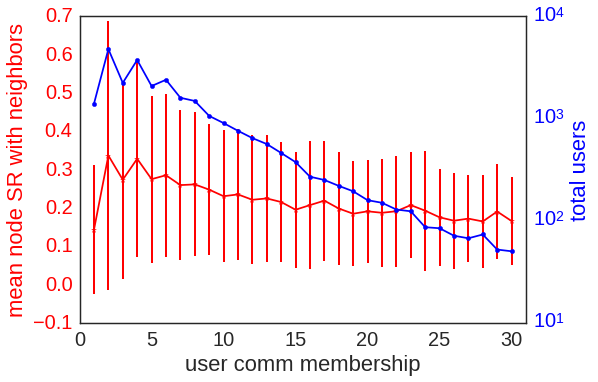

In [159]:
plot_avg_neighborhood_SR_vs_COMM_membership()

In [160]:
def find_avg_SEM_cap_per_node_COMM_membership():
    node_comm_membership = find_nodes_in_more_COMM()
    sem_cap = read_sem_capital()
    res = defaultdict(list)
    for node in node_comm_membership:
        n_sem = sem_cap[str(node)]
        nCOMM = node_comm_membership[node] if node_comm_membership[node] < N_overlap_comm else N_overlap_comm
        res[nCOMM].append(n_sem)
    res_mean = defaultdict(float)
    res_stdev = defaultdict(float)
    for COMM in res:
        res_mean[COMM] = np.mean(np.array(res[COMM]))
        res_stdev[COMM] = np.std(np.array(res[COMM]))
    return res_mean, res_stdev

In [161]:
def plot_SEM_CAP_vs_COMM_membership():
    fig, ax1 = plt.subplots()
    ax1.set_xlabel('user comm membership')
    
    d, std = find_avg_SEM_cap_per_node_COMM_membership()
    x = d.keys()
    y = d.values()
    e = std.values()
    ax1.set_ylabel('mean user semantic capital', color='darkred')
    ax1.tick_params('y', colors='darkred')
    ax1.errorbar(x,y,e,linestyle="-",marker='*',color='darkred',fmt='o',elinewidth=2.0)
    ax1.set_xlim([0,N_overlap_comm+1])
    
    ax2 = ax1.twinx()
    pluralistic_classes = how_many_nodes_with_pluralistic_level()
    z = np.array([pluralistic_classes[s] for s in x])
    ax2.scatter(x,z,marker='o',color='blue')
    ax2.plot(x,z,'-', color='blue')
    ax2.set_ylabel('total users', color='blue')
    ax2.tick_params('y', colors='blue')
    ax2.set_yscale('log')
    ax1.set_xlim([0,N_overlap_comm+1])
    
    print 'Corrcoef SEM CAP and comm membership ',  pearsonr(np.array(x), np.array(y))
      
    #plt.tight_layout()
    plt.savefig('SBM_overlap_node_comm_membership_vs_avg_SEM_CAP.jpg', bbox_inches='tight')
    plt.show()

840
840
Corrcoef SEM CAP and comm membership  (0.89827739477819624, 1.6540603793042782e-11)


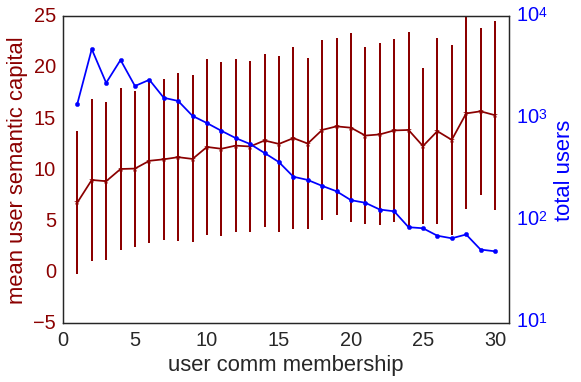

In [162]:
plot_SEM_CAP_vs_COMM_membership()

# Let us try something new with communities

In [163]:
N_shared = 15

In [164]:
def read_in_mention_graph():
    d = defaultdict(int)
    fn = 'mention_graph_weights.dat'
    f = open(fn, 'r')
    for line in f:
        (u1, u2, w) = line.split()
        d[int(u1), int(u2)] = int(w)
    return d

In [165]:
def find_node_interaction_comm_propensity():
    d = read_in_mention_graph()
    cnt_edges = 0
    node_comm_membership = find_nodes_COMM()
    comm_mem = defaultdict(list)
    comm_mem_total_pairs = defaultdict(list)
    
    max_shared = 0
    for (u1, u2) in d:
        comms_u1 = node_comm_membership[int(u1)]
        comms_u2 = node_comm_membership[int(u2)]
        shared = len(set(comms_u1).intersection(set(comms_u2)))
        if shared > max_shared:
            max_shared = shared
        if shared > N_shared:
            shared = N_shared 
        comm_mem[shared].append(d[(u1, u2)])
        if shared not in comm_mem_total_pairs:
            comm_mem_total_pairs[shared] = defaultdict(int)
        if u2 > u1:
            pom = u2
            u2 = u1
            u1 = pom
        comm_mem_total_pairs[shared][((u1, u2))] = 1
        cnt_edges += 1
    N = cnt_edges
    print N
    
    comm_mem_mean = OrderedDict()
    comm_mem_std = OrderedDict()
    

    for comm in comm_mem:
        comm_mem_mean[comm] = np.mean(np.array(comm_mem[comm]))
        comm_mem_std[comm] = np.std(np.array(comm_mem[comm]))
        comm_mem_total_pairs[comm] = sum(comm_mem_total_pairs[comm].values())
    print 'Max shared COMM ', max_shared
    return comm_mem_mean, comm_mem_std, comm_mem_total_pairs

In [166]:
def plot_interaction_comm_propensity():
    comm_mem_mean, comm_mem_std, comm_mem_total_pairs = find_node_interaction_comm_propensity()

    fig, ax1 = plt.subplots()
    ax1.set_xlabel('shared comm between nodes')
    
    x = comm_mem_mean.keys()
    y = comm_mem_mean.values()
    e = comm_mem_std.values()
    z = comm_mem_total_pairs.values()

    ax1.set_ylabel('communication intensity', color='r')
    ax1.tick_params('y', colors='r')
    ax1.errorbar(x,y,e,linestyle="-",marker='*',color='r',fmt='o',elinewidth=2.0)
    ax1.set_xlim([-1,N_shared+1])
    
    ax2 = ax1.twinx()
    ax2.scatter(x,z,marker='o',color='darkblue')
    ax2.plot(x,z,'-', color='darkblue')
    ax2.set_ylabel('total user pairs', color='darkblue')
    ax2.tick_params('y', colors='darkblue')
    ax2.set_yscale('log')
    ax2.set_xlim([-1,N_shared+1])
    
    plt.savefig('Infomap_node_shared_comm_vs_CI.jpg', bbox_inches='tight')
    
    print pearsonr(np.array(x), np.array(y))

99910
Max shared COMM  0
(nan, nan)


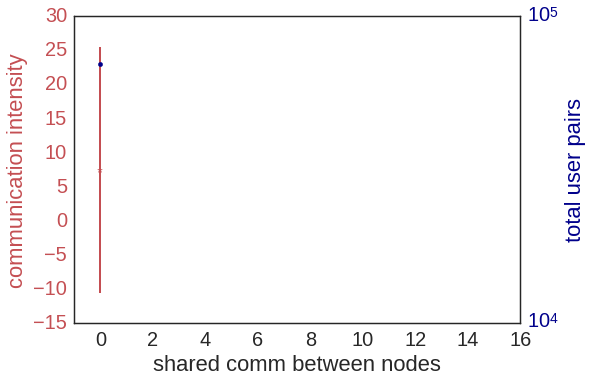

In [167]:
plot_interaction_comm_propensity()

# SR vs shared comm 

In [366]:
def read_in_SR_graph_simple():
    d = defaultdict(int)
    fn = 'mention_graph_IDs_with_SR.dat'
    f = open(fn, 'r')
    for line in f:
        (u1, u2, w) = line.split()
        d[int(u1), int(u2)] = float(w)
    return d

In [370]:
def find_node_SR_vs_shared_comm():
    d = read_in_SR_graph_simple()
    cnt_edges = 0
    node_comm_membership = find_nodes_COMM()
    comm_mem = defaultdict(list)
    comm_mem_total_pairs = defaultdict(list)
    
    max_shared = 0
    for (u1, u2) in d:
        comms_u1 = node_comm_membership[int(u1)]
        comms_u2 = node_comm_membership[int(u2)]
        shared = len(set(comms_u1).intersection(set(comms_u2)))
        if shared > max_shared:
            max_shared = shared
        if shared > N_shared:
            shared = N_shared 
        comm_mem[shared].append(d[(u1, u2)])
        if shared not in comm_mem_total_pairs:
            comm_mem_total_pairs[shared] = defaultdict(int)
        if u2 > u1:
            pom = u2
            u2 = u1
            u1 = pom
        comm_mem_total_pairs[shared][((u1, u2))] = 1
        cnt_edges += 1
    N = cnt_edges
    print N
    
    comm_mem_mean = OrderedDict()
    comm_mem_std = OrderedDict()
    

    for comm in comm_mem:
        comm_mem_mean[comm] = np.mean(np.array(comm_mem[comm]))
        comm_mem_std[comm] = np.std(np.array(comm_mem[comm]))
        comm_mem_total_pairs[comm] = sum(comm_mem_total_pairs[comm].values())
    print 'Max shared COMM ', max_shared
    return comm_mem_mean, comm_mem_std, comm_mem_total_pairs

In [43]:
def plot_SR_vs_shared_comm():
    comm_mem_mean, comm_mem_std, comm_mem_total_pairs = find_node_SR_vs_shared_comm()

    fig, ax1 = plt.subplots()
    ax1.set_xlabel('shared comm between nodes')
    
    x = comm_mem_mean.keys()
    y = comm_mem_mean.values()
    e = comm_mem_std.values()
    z = comm_mem_total_pairs.values()

    ax1.set_ylabel('SR', color='r')
    ax1.tick_params('y', colors='r')
    ax1.errorbar(x,y,e,linestyle="-",marker='*',color='r',fmt='o',elinewidth=2.0)
    ax1.set_xlim([-1,N_shared+1])
    
    ax2 = ax1.twinx()
    ax2.scatter(x,z,marker='o',color='darkblue')
    ax2.plot(x,z,'-', color='darkblue')
    ax2.set_ylabel('total user pairs', color='darkblue')
    ax2.tick_params('y', colors='darkblue')
    ax2.set_yscale('log')
    ax2.set_xlim([-1,N_shared+1])
    
    plt.savefig('SBM_overlap_node_shared_comm_vs_SR.jpg', bbox_inches='tight')
   
    print pearsonr(np.array(x), np.array(y))

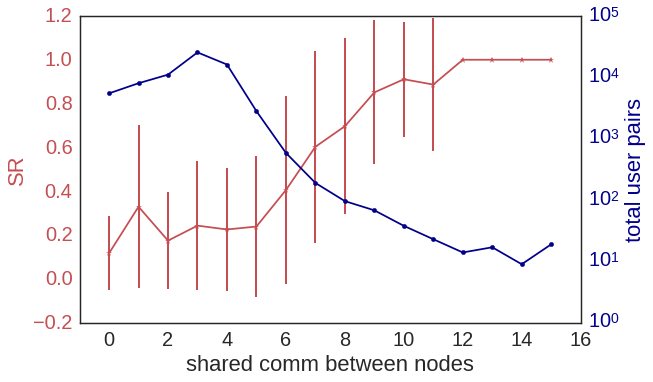

In [372]:
plot_SR_vs_shared_comm()

# Sentiment vs shared comm 

In [373]:
def find_node_sentiment_vs_shared_comm():
    d = read_in_SR_graph_simple()
    sent = read_sem_capital(f_name='user_sentiment.tab', tname='sentiment')
    cnt_edges = 0
    node_comm_membership = find_nodes_COMM()
    comm_mem = defaultdict(list)
    comm_mem_total_pairs = defaultdict(list)
    
    max_shared = 0
    for (u1, u2) in d:
        comms_u1 = node_comm_membership[int(u1)]
        comms_u2 = node_comm_membership[int(u2)]
        shared = len(set(comms_u1).intersection(set(comms_u2)))
        if shared > max_shared:
            max_shared = shared
        if shared > N_shared:
            shared = N_shared 
        comm_mem[shared].append(abs(sent[str(u1)] - sent[str(u2)]))
        if shared not in comm_mem_total_pairs:
            comm_mem_total_pairs[shared] = defaultdict(int)
        if u2 > u1:
            pom = u2
            u2 = u1
            u1 = pom
        comm_mem_total_pairs[shared][((u1, u2))] = 1
        cnt_edges += 1
    N = cnt_edges
    print N
    
    comm_mem_mean = OrderedDict()
    comm_mem_std = OrderedDict()
    

    for comm in comm_mem:
        comm_mem_mean[comm] = np.mean(np.array(comm_mem[comm]))
        comm_mem_std[comm] = np.std(np.array(comm_mem[comm]))
        comm_mem_total_pairs[comm] = sum(comm_mem_total_pairs[comm].values())
    print 'Max shared COMM ', max_shared
    return comm_mem_mean, comm_mem_std, comm_mem_total_pairs

In [44]:
def plot_sent_diff_vs_shared_comm():
    comm_mem_mean, comm_mem_std, comm_mem_total_pairs = find_node_sentiment_vs_shared_comm()

    fig, ax1 = plt.subplots()
    ax1.set_xlabel('shared comm between nodes')
    
    x = comm_mem_mean.keys()
    y = comm_mem_mean.values()
    e = comm_mem_std.values()
    z = comm_mem_total_pairs.values()

    ax1.set_ylabel('sentiment difference', color='r')
    ax1.tick_params('y', colors='r')
    ax1.errorbar(x,y,e,linestyle="-",marker='*',color='r',fmt='o',elinewidth=2.0)
    ax1.set_xlim([-1,N_shared+1])
    
    ax2 = ax1.twinx()
    ax2.scatter(x,z,marker='o',color='darkblue')
    ax2.plot(x,z,'-', color='darkblue')
    ax2.set_ylabel('total user pairs', color='darkblue')
    ax2.tick_params('y', colors='darkblue')
    ax2.set_yscale('log')
    ax2.set_xlim([-1,N_shared+1])
    
    
    plt.savefig('SBM_overlap_node_shared_comm_vs_sentiment.jpg', bbox_inches='tight')
    
    print pearsonr(np.array(x), np.array(y))

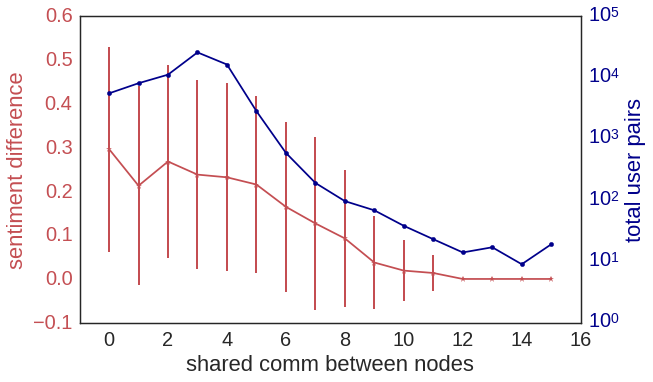

In [375]:
plot_sent_diff_vs_shared_comm()

# Community density

In [87]:
def find_overlapping_COMM():
    nodes_num_COMM = find_nodes_in_more_COMM()
    COMM_density = defaultdict(list)
    output = read_output()

    for comm in output:
        for node in output[comm]:
            COMM_density[comm].append(nodes_num_COMM[int(node)])
            
    COMM_density2 =  defaultdict(tuple)
    for COMM in COMM_density:
        COMM_density2[COMM] = (np.mean(np.array(COMM_density[COMM])), len(COMM_density[COMM]))
    COMM_density3 = OrderedDict(sorted(COMM_density2.items(), key=lambda t:t[1][0]))
    
    return COMM_density3

In [90]:
def plot_COMM_size_vs_density():
    import seaborn as sns
    sns.set(color_codes=True, font_scale=2) 

    x = []
    y = []

    data = find_overlapping_COMM()
    
    for COMM in data:
        x.append(data[COMM][0])
        y.append(data[COMM][1])

    x = np.array(x)
    y = np.array(y)

    print 'Corrcoef COMM size and density ',  pearsonr(np.array(x), np.array(y))
    (r, p) = pearsonr(np.log(np.array(x)), np.array(y))

    lab = r'$r=' +  "{:.2f}".format(r) + '$, $p= ' + "{:.2f}".format(p) + '$'
    xlabel = 'comm density'
    ylabel = 'comm size'

    sns.set_style("white")
    plt.scatter(x, y, edgecolors='none', c='c', label=lab)
    
    #g = sns.jointplot(x=x, y=y, kind='reg',annot_kws=dict(stat="r"),   \
    #    joint_kws={'line_kws':{'color':'gray', 'alpha':0.3, 'markeredgewidth':0}}).set_axis_labels(xlabel, ylabel)

    #regline = g.ax_joint.get_lines()[0]
    #regline.set_color('c')
    #regline.set_zorder('5')
    
    #ax = g.ax_joint
    #ax.set_xscale('log')
    #g.ax_marg_x.set_xscale('log')

    #labelsx = ['0','','1','', '2','', '3','','4']
    #g.ax_joint.set_xticklabels(labelsx)
    
    #plt.yscale('log')

    #plt.legend(frameon=0, loc=2)
    #plt.show()
    #plt.tight_layout()
    plt.savefig('node_comm_size_density777.pdf',bbox_inches='tight' , dpi=550)
    plt.show()

100
Corrcoef COMM size and density  (-0.1346547348073163, 0.18164408446472341)


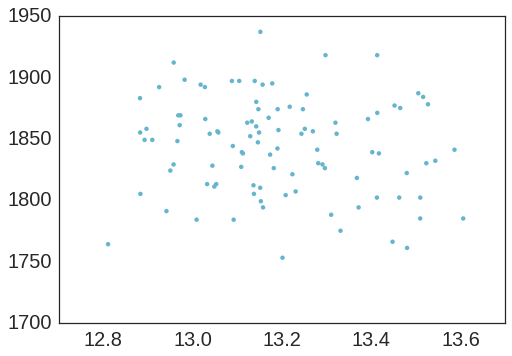

In [91]:
plot_COMM_size_vs_density()

In [92]:
def find_avg_ST_INC_per_node_COMM_membership():
    node_comm_membership = find_nodes_in_more_COMM()
    sem_cap = read_sem_capital(f_name='status_inconsistency', tname='status_inconsistency')
    res = defaultdict(list)
    for node in node_comm_membership:
        n_sem = sem_cap[str(node)] 
        nCOMM = node_comm_membership[node] if node_comm_membership[node] < N_overlap_comm else N_overlap_comm
        res[nCOMM].append(n_sem)
    res_mean = defaultdict(float)
    res_stdev = defaultdict(float)
    for COMM in res:
        res_mean[COMM] = np.mean(np.array(res[COMM]))
        res_stdev[COMM] = np.std(np.array(res[COMM]))
    return res_mean, res_stdev

In [95]:
def plot_ST_INC_vs_COMM_membership():
    
    fig, ax1 = plt.subplots()
    ax1.set_xlabel('user comm membership')
    
    d, std = find_avg_ST_INC_per_node_COMM_membership()
    x = d.keys()
    y = d.values()
    e = std.values()
    ax1.set_ylabel('mean user $st_{inc}$', color='darkcyan')
    ax1.tick_params('y', colors='darkcyan')
    ax1.errorbar(x,y,e,linestyle="-",marker='*',color='darkcyan',fmt='o',elinewidth=2.0)
    ax1.set_xlim([0,N_overlap_comm+1])
    
    ax2 = ax1.twinx()
    pluralistic_classes = how_many_nodes_with_pluralistic_level()
    z = np.array([pluralistic_classes[s] for s in x])
    ax2.scatter(x,z,marker='o',color='darkblue')
    ax2.plot(x,z,'-', color='darkblue')
    ax2.set_ylabel('total users', color='darkblue')
    ax2.tick_params('y', colors='darkblue')
    ax2.set_yscale('log')
    ax1.set_xlim([0,N_overlap_comm+1])
    
    print 'Corrcoef ST INC and comm membership ',  pearsonr(np.array(x), np.array(y))
      
    #plt.tight_layout() 
    plt.savefig('SBM_overlap_node_comm_membership_vs_mean_ST_INC.eps', bbox_inches='tight')
    plt.show()

100
100
Corrcoef ST INC and comm membership  (0.91773005592974399, 1.4315663634309755e-06)


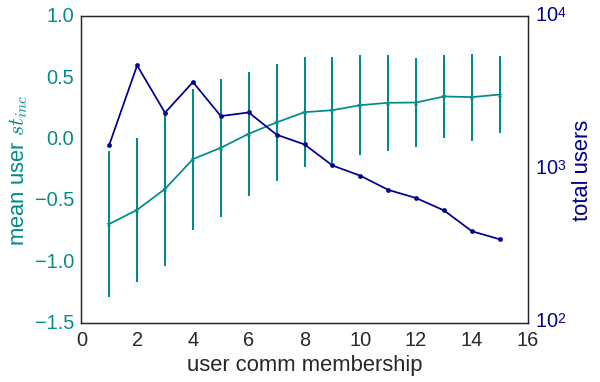

In [96]:
plot_ST_INC_vs_COMM_membership()

# Sentiment

In [97]:
def find_avg_sentiment_per_node_COMM_membership():
    node_comm_membership = find_nodes_in_more_COMM()
    sem_cap = read_sem_capital(f_name='user_sentiment.tab', tname='sentiment')
    res = defaultdict(list)
    for node in node_comm_membership:
        n_sem = sem_cap[str(node)]
        nCOMM = node_comm_membership[node] if node_comm_membership[node] < N_overlap_comm else N_overlap_comm
        res[nCOMM].append(n_sem)
    res_mean = defaultdict(float)
    res_stdev = defaultdict(float)
    for COMM in res:
        res_mean[COMM] = np.mean(np.array(res[COMM]))
        res_stdev[COMM] = np.std(np.array(res[COMM]))
    return res_mean, res_stdev

In [100]:
def plot_sentiment_vs_COMM_membership():
    d, std = find_avg_sentiment_per_node_COMM_membership()
    x = d.keys()
    y = d.values()
    e = std.values()
    print 'Corrcoef sentiment and comm membership ',  pearsonr(np.array(x), np.array(y))
    plt.errorbar(x,y,e,linestyle="-",marker='*',color='darkcyan',label='mean sentiment per comm membership ')
    #plt.yscale('log', nonposy='clip')
    plt.xlabel('node comm membership')
    plt.ylabel('mean node sentiment')
    #plt.legend(loc=2,frameon=False)
    plt.xlim(0,N_overlap_comm+1)
    #plt.ylim(-0.1,0.1)
    #plt.title(r'Histogram for mention network pairwise SR: $\mu=' +  "{:.3f}".format(mu) + '$, $\sigma= ' + "{:.3f}".format(sigma) + '$')
    #plt.grid(True)
    plt.savefig('node_comm_membership_vs_avg_sentiment.jpg')
    plt.show()

100
Corrcoef sentiment and comm membership  (0.20478338206311464, 0.46408899060042141)


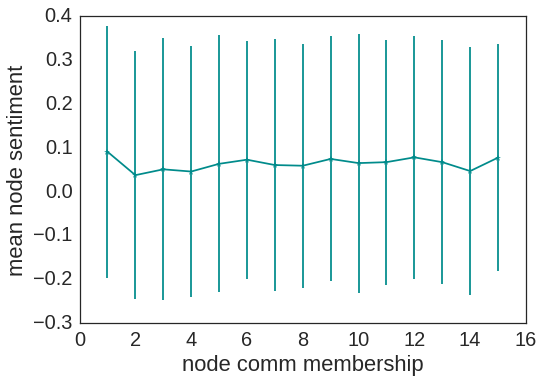

In [101]:
plot_sentiment_vs_COMM_membership()

# Entities, concepts, taxonomies etc.

In [102]:
##################################################
# read in a map for the twitter username --> id
##################################################
def read_user_IDs():

    user_ids = defaultdict(str)

    with codecs.open('../user_IDs.dat','r', encoding='utf8') as f:
        for line in f:
            line = line.split()
            user_id = line[0]
            user =  line[1]
            user_ids[user] = int(user_id)

    return user_ids

In [103]:
def plot_taxonomy(tokens, weights, max_tokens, tokens_name, COM='ALL'):
    df = pd.DataFrame({'token': tokens, 'weight': weights})
    df.sort('weight', inplace=True, ascending=False)
    if df.shape[0] > max_tokens:
        tail = df.ix[max_tokens:, 'weight'].sum()
        df2 = df.iloc[0:max_tokens].copy()
        nrow = pd.Series({'token': '--[other ' + tokens_name + ']--', 'weight': tail})
        df2.ix[df2.shape[0]] = nrow
        df2.index = np.arange(df2.shape[0])
    else:
        df2 = df
        
    # Let's plot something better than a word cloud!

    plt.figure(figsize=(10,5))
    plt.title('community ' + COM)
    colors = []
    for c in range(df2.shape[0]-1):
        colors.append('#383838')
    colors.append('#ebe728')
    plt.barh(df2.index * -1, np.log(df2['weight']), color=colors)
    plt.gca().yaxis.grid(False)
    plt.yticks(df2.index * -1 + 1.0, df2['token'])
    plt.ylim(-1 * df2.shape[0] + 1.4, 1)
    plt.xlabel(tokens_name + ' weight')
    plt.savefig(COM+tokens_name+'.jpg', bbox_inches='tight')
    if tokens_name == 'entity':
        plt.show()

In [104]:
##################################################
# the core function for the user lists, comm etc.
##################################################
"""
    here, the options are to visualize the taxonomy for the whole dataset (COM="ALL")
    and to visualize for different communities (COM="COM") that are read in through read_in_communities()
    in the case of communities, this functions is invoked once per each community
    -- user_list holds the ids of the users in one community
    -- TOP_N holds the number of top concepts, keywords and entities that we want to visualize and record
    -- user_com holds a map for user_id --> com_id
    -- N_COM holds the total number of communities found (changes depending on the community detection algorithm)
"""
def find_taxonomy_of_user_list(user_ids=read_user_IDs(), COM='ALL', user_list=None, TOP_N=20):

    # resulting dictionaries in which the counts and tfidf relevance are collected
    keywords_sum = defaultdict(int)
    entities_sum = defaultdict(int)
    concepts_sum = defaultdict(int)
    taxonomies_sum = defaultdict(int) 
    
    docSentiment_sum = defaultdict(int)
    
    print user_list

    cnt = 0
    with codecs.open('../tweets_taxonomy_clean.JSON','r', encoding='utf8') as input_file:
        for line7s in input_file:
            try:
                line = json.loads(line7s)
                user_name = line["_id"]
                user_name = str(user_name)
                user_id = user_ids[user_name]
                if user_list is not None:
                    if not user_id in user_list:
                        print user_id
                        continue
                # if dealing with ALL, take all the users
                taxonomy_all = line["taxonomy"]
                keywords = taxonomy_all["keywords"]
                entities = taxonomy_all["entities"]
                concepts = taxonomy_all["concepts"] 
                taxonomy = taxonomy_all["taxonomy"] 
                #
                docSentiment = taxonomy_all["docSentiment"] 
                # this counts how many user we have analyzed
                cnt += 1
            except KeyError:
                #print line7s
                # we don't print since it is tested, there some 10% users for whom
                # the taxonomy was not successfuly downloaded and they would be listed here
                continue
            
            for el in keywords:
                category = el["text"]
                # if we first time encounter this keyword, add a dict for it in the result
                if not category in keywords_sum:
                    keywords_sum[category] = defaultdict(int)
                # we use this not so well coded part because tuples do not allow assignment
                old_relev = keywords_sum[category][0]
                old_cnt = keywords_sum[category][1]
                new_relev = old_relev + float(el["relevance"])
                new_cnt = old_cnt + 1
                keywords_sum[category] = (new_relev, new_cnt)

            for el in entities:
                entity = el["text"]
                if entity in ['#', '#MentionTo', 'twitter', 'Twitter']:
                    continue
                # if we first time encounter this entity, add a dict for it in the result
                if not entity in entities_sum:
                    entities_sum[entity] = defaultdict(int)
                # we use this not so well coded part because tuples do not allow assignment
                old_relev = entities_sum[entity][0]
                old_cnt = entities_sum[entity][1]
                new_relev = old_relev + float(el["relevance"])
                new_cnt = old_cnt + 1
                entities_sum[entity] = (new_relev, new_cnt, el["type"])

            for el in concepts:
                concept = el["text"]
                if concept in ['Trigraph', 'Gh', 'trigraph']:
                    continue
                # if we first time encounter this concept, add a dict for it in the result
                if not concept in concepts_sum:
                    concepts_sum[concept] = defaultdict(int)
                # we use this not so well coded part because tuples do not allow assignment
                old_relev = concepts_sum[concept][0]
                old_cnt = concepts_sum[concept][1]
                new_relev = old_relev + float(el["relevance"])
                new_cnt = old_cnt + 1
                concepts_sum[concept] = (new_relev, new_cnt)

            # a bit different procedure for extracting the sentiment
            sentiment = docSentiment["type"]
            if sentiment == "neutral":
                docSentiment_sum[sentiment] += 1
            else:
                if not sentiment in docSentiment_sum:
                    docSentiment_sum[sentiment] = defaultdict(int)
                old_score = docSentiment_sum[sentiment][0]
                old_cnt = docSentiment_sum[sentiment][1]
                old_mixed_cnt = docSentiment_sum[sentiment][2]
                try:
                    new_score = old_score + float(docSentiment["score"])
                except KeyError:
                    continue
                new_cnt = old_cnt + 1
                try:
                    new_mixed_cnt = old_mixed_cnt + int(docSentiment["mixed"])
                except KeyError:
                    continue
                docSentiment_sum[sentiment] = (new_score, new_cnt, new_mixed_cnt)


            for el in taxonomy:
                taxonomy_tree = el["label"]
                taxon = taxonomy_tree
                if not taxon in taxonomies_sum:
                    taxonomies_sum[taxon] = defaultdict(int)
                old_score = taxonomies_sum[taxon][0]
                old_cnt = taxonomies_sum[taxon][1]
                new_score = old_score + float(el["score"])
                new_cnt = old_cnt + 1
                taxonomies_sum[taxon] = (new_score, new_cnt)

        com_size = cnt
        # THIS IS A CONSTANT, because we know how many users there are in total after we did one ALL run
        N = 27665
        print "*** The user list %s ***" % COM
        print "Analyzed %d users out of total %d users " % (com_size, N)
        try:
            pos_users = docSentiment_sum["positive"][1]
            pos_score = docSentiment_sum["positive"][0]
        except TypeError:
            pos_users = 0
            pos_score = 0
        try:
            neg_users = docSentiment_sum["negative"][1]
            neg_score = docSentiment_sum["negative"][0]
        except TypeError:
            neg_users = 0
            neg_score = 0
        try:
            neu_users = docSentiment_sum["neutral"]
        except TypeError:
            neu_users = 0

        print "___________________"
        print "Sentiment stats: positive %d users; negative %d users; and neutral %d " % (pos_users, neg_users, neu_users)
        print "Sentiment score: positive %f ; negative %f; and the sum sentiment %f " % (pos_score, neg_score, pos_score + neg_score)
        print "Overall positive sentiment pct is %f " % (float(pos_users)/com_size)
        print "___________________"
        print "Total keywords found ", len(keywords_sum)
        print "Total entities found ", len(entities_sum)
        print "Total concepts found ", len(concepts_sum)
        print "Total taxonomies on different levels found ", len(taxonomies_sum)
        print "___________________"

        #####################
        ## STARTS plotting ##
        #####################
        
        #####################
        ##    KEYWORDS     ##
        #####################
        for kw in keywords_sum:
            tot_relev = keywords_sum[kw][0]
            tot_cnt = keywords_sum[kw][1]
            inv_kw_fq = 0 if tot_cnt == 0 else N/float(tot_cnt)
            tfidf = float(tot_relev * math.log(1.0 + inv_kw_fq))
            keywords_sum[kw] = (tot_relev, tot_cnt, tfidf)
        
        print
        print "Keywords (ordered by TF-IDF): [relevance, count, TF-IDF]"
        ord_keywords_sum2 = OrderedDict(sorted(keywords_sum.items(), key=lambda x: x[1][0], reverse = True))
        NN = len(ord_keywords_sum2.items())
        labels = np.empty([NN], dtype="<U26")
        sizes = np.empty([NN], dtype=float)
        sizes_tot = np.empty([NN], dtype=float)
        i = 0
        for el in ord_keywords_sum2:
            print el.encode('utf-8'), ord_keywords_sum2[el]
            labels[i] = el
            sizes[i] = float(ord_keywords_sum2[el][1])
            sizes_tot[i] = float(ord_keywords_sum2[el][0])
            i += 1
            #if i == TOP_N:
            #    break

                
        plot_taxonomy(tokens=labels, weights=sizes_tot, max_tokens=TOP_N, tokens_name='keyword', COM=COM)
        #plot_taxonomy(labels, sizes_tot, "kw_com_" + str(COM) + ".png")
        plt.clf()
        print

        #####################
        ##    ENTITIES     ##
        #####################
        for en in entities_sum:
            tot_relev = entities_sum[en][0]
            tot_cnt = entities_sum[en][1]
            inv_ent_fq = 0 if tot_cnt == 0 else N/float(tot_cnt)
            tfidf = tot_relev * math.log(1.0 + inv_ent_fq)
            entities_sum[en] = (tot_relev, tot_cnt, tfidf)  

        print "Entities (sorted by TF-IDF): [relevance, count, TF-IDF]"
        ord_entities_sum2 = OrderedDict(sorted(entities_sum.items(), key=lambda x: x[1][0], reverse = True))
        NN = len(ord_keywords_sum2.items())
        labels = np.empty([NN], dtype="<U26")
        sizes = np.empty([NN], dtype=float)
        sizes_tot = np.empty([NN], dtype=float)
        i = 0
        for el in ord_entities_sum2:
            print el.encode('utf-8'), ord_entities_sum2[el]
            labels[i] = el
            #print labels
            sizes_tot[i] = float(ord_entities_sum2[el][0])
            sizes[i] = float(ord_entities_sum2[el][2])
            i += 1
            #if i == TOP_N:
            #    break

        plot_taxonomy(tokens=labels, weights=sizes_tot, max_tokens=TOP_N, tokens_name='entity', COM=COM)
        plt.clf()
        print

        #####################
        ##    CONCEPTS     ##
        #####################
        for conc in concepts_sum:
            tot_relev = concepts_sum[conc][0]
            tot_cnt = concepts_sum[conc][1]
            inv_fq = 0 if tot_cnt == 0 else N/float(tot_cnt)
            tfidf = float(tot_relev * math.log(1.0 + inv_fq))
            concepts_sum[conc] = (tot_relev, tot_cnt, tfidf)

        print "Concepts (sorted by TF-IDF): [relevance, count, TF-IDF]"
        ord_concepts_sum = OrderedDict(sorted(concepts_sum.items(), key=lambda x: x[1][0], reverse = True))
        NN = len(ord_keywords_sum2.items())
        labels = np.empty([NN], dtype="<U26")
        sizes = np.empty([NN], dtype=float)
        sizes_tot = np.empty([NN], dtype=float)
        i = 0
        for el in ord_concepts_sum:
            print el.encode('utf-8'), ord_concepts_sum[el]
            labels[i] = el
            sizes[i] = float(ord_concepts_sum[el][2])
            sizes_tot[i] = float(ord_concepts_sum[el][0])
            i += 1
            #if i == TOP_N:
            #    break

        plot_taxonomy(tokens=labels, weights=sizes_tot, max_tokens=TOP_N, tokens_name='concept', COM=COM)
        #plot_pie(labels, sizes_tot, "concept_" + str(COM) + ".png")
        plt.clf()
        print

        #####################
        ##   TAXONOMIES    ##
        #####################
        for taxon in taxonomies_sum:
            tot_score = taxonomies_sum[taxon][0]
            tot_cnt = taxonomies_sum[taxon][1]
            inv_fq = 0 if tot_cnt == 0 else N/float(tot_cnt)
            tfidf = float(tot_score * math.log(1.0 + inv_fq))
            taxonomies_sum[taxon] = (tot_score, tot_cnt, tfidf)


        print "Taxonomies (sorted by TF-IDF): [relevance, count, TF-IDF]"
        ord_taxonomies_sum = OrderedDict(sorted(taxonomies_sum.items(), key=lambda x: x[1][0], reverse = True))
        NN = len(ord_keywords_sum2.items())
        labels = np.empty([NN], dtype="<U26")
        sizes = np.empty([NN], dtype=float)
        sizes_tot = np.empty([NN], dtype=float)
        i = 0
        for el in ord_taxonomies_sum:
            print el.encode('utf-8'), ord_taxonomies_sum[el]
            labels[i] = el
            sizes[i] = float(ord_taxonomies_sum[el][2])
            sizes_tot[i] = float(ord_taxonomies_sum[el][0])
            i += 1
            #if i == TOP_N:
            #    break

        plot_taxonomy(tokens=labels, weights=sizes_tot, max_tokens=TOP_N, tokens_name='taxonomy', COM=COM)
        #plot_pie(labels, sizes_tot, "taxon_" + str(COM) + ".png")
        plt.clf()
        print

In [107]:
def main(sizeN='ALL'):

    if sizeN == "ALL":
        #sys.stdout = open('../ALL/top_20_stats', 'w')
        find_taxonomy_of_user_list()
    else:
        #sys.stdout = open('InfoMap_taxonomy_stats_' + f_in_Infomap_output_comm + '.txt', 'w')
        top_communities = read_in_top_communities(sizeN)
        print len(top_communities), "top communities found of size", str(sizeN)

        for community in top_communities:
            # user_ids=read_user_IDs(), COM='ALL', user_list=None, TOP_N=20
            user_list_int = [int(x) for x in top_communities[community]]
            find_taxonomy_of_user_list(user_ids=read_user_IDs(), COM=str(community), user_list=top_communities[community], TOP_N=20)


In [108]:
main(sizeN=1894)

9 top communities found of size 1894
[u'22430', u'5660', u'27677', u'18778', u'23597', u'28522', u'8528', u'24466', u'21019', u'25733', u'16161', u'26536', u'21133', u'26527', u'21941', u'19396', u'6987', u'7278', u'20611', u'20181', u'14808', u'13067', u'21726', u'28240', u'23573', u'24833', u'4129', u'27080', u'3964', u'12982', u'1700', u'2320', u'18055', u'645', u'7170', u'11237', u'16160', u'1826', u'19087', u'8213', u'9211', u'11289', u'22371', u'14856', u'19050', u'21108', u'8771', u'23054', u'1291', u'16970', u'7328', u'3891', u'26991', u'20532', u'31', u'13220', u'4245', u'26685', u'16065', u'23631', u'1861', u'14304', u'28472', u'5329', u'2168', u'3913', u'17750', u'14636', u'475', u'8211', u'5437', u'22458', u'21271', u'17909', u'2184', u'1189', u'5680', u'11344', u'21670', u'18506', u'16346', u'9540', u'17805', u'7823', u'24305', u'21254', u'23751', u'24119', u'20800', u'7561', u'19880', u'9813', u'7047', u'7747', u'6186', u'17842', u'467', u'18805', u'12211', u'23879', u'82

10364
10365
10366
10367
10368
10370
10372
10373
10374
10376
10377
10378
10379
10380
10381
10382
10383
10384
10385
10386
10387
10388
10389
10390
10391
10392
10393
10394
10395
10396
10397
10398
10399
10400
10401
10402
10404
10405
10406
10407
10408
10409
10410
10411
10412
10413
10414
10415
10416
10418
10420
10421
10422
10423
10424
10425
10426
10427
10428
10429
10430
10432
10433
10434
10435
10436
10437
10438
10439
10440
10441
10443
10444
10445
10446
10447
10448
10449
10450
10451
10452
10453
10454
10455
10456
10457
10458
10459
10461
10462
10463
10464
10465
10466
10467
10468
10469
10470
10471
10472
10473
10474
10475
10476
10477
10478
10479
10480
10482
10483
10484
10486
10487
10488
10489
10490
10492
10493
10494
10495
10496
10497
10498
10499
10500
10501
10502
10504
10505
10506
10507
10508
10509
10510
10512
10513
10515
10516
10517
10518
10519
10520
10521
10522
10523
10524
10525
10526
10527
10528
10529
10530
10531
10532
10533
10534
10535
10536
10537
10538
10539
10540
10542
10543
10544
10545
1054

11903
11904
11905
11906
11907
11908
11909
11910
11911
11912
11913
11914
11915
11916
11917
11919
11920
11921
11922
11923
11924
11925
11926
11927
11928
11929
11930
11931
11932
11933
11934
11935
11936
11937
11938
11939
11940
11941
11942
11943
11944
11945
11947
11948
11949
11950
11952
11953
11954
11955
11956
11957
11959
11960
11961
11962
11963
11964
11965
11966
11967
11968
11969
11970
11971
11973
11974
11975
11976
11977
11978
11979
11980
11982
11983
11984
11985
11986
11987
11988
11989
11990
11991
11992
11993
11994
11995
11996
11997
11998
11999
12000
12001
12002
12003
12004
12005
12006
12007
12008
12009
12010
12011
12013
12014
12015
12016
12017
12018
12019
12020
12021
12023
12024
12025
12027
12029
12030
12031
12032
12033
12034
12035
12036
12037
12038
12039
12040
12041
12042
12043
12044
12045
12046
12047
12048
12049
12050
12051
12052
12053
12054
12055
12056
12057
12058
12059
12060
12061
12062
12063
12064
12065
12066
12067
12068
12069
12070
12071
12072
12073
12074
12075
12076
12077
12078
1207

13547
13548
13549
13550
13551
13552
13553
13554
13555
13556
13557
13558
13559
13560
13561
13562
13563
13564
13565
13566
13567
13568
13569
13570
13571
13572
13573
13574
13575
13576
13577
13578
13579
13580
13581
13582
13583
13584
13585
13586
13587
13588
13589
13590
13591
13592
13593
13594
13596
13597
13598
13599
13600
13601
13602
13603
13604
13605
13606
13607
13608
13609
13610
13611
13612
13614
13615
13616
13617
13618
13619
13620
13621
13622
13623
13624
13625
13626
13627
13629
13630
13631
13632
13633
13634
13635
13636
13637
13638
13639
13640
13641
13642
13643
13644
13645
13646
13647
13648
13649
13650
13651
13652
13653
13655
13657
13658
13659
13660
13661
13662
13663
13664
13665
13666
13668
13670
13671
13673
13674
13675
13676
13677
13678
13679
13680
13681
13682
13683
13684
13685
13686
13687
13688
13689
13690
13691
13693
13694
13695
13696
13697
13698
13699
13700
13701
13702
13704
13705
13706
13708
13709
13711
13712
13713
13714
13715
13716
13717
13718
13719
13720
13721
13723
13724
13725
1372

15098
15099
15100
15101
15102
15103
15104
15105
15106
15107
15108
15109
15110
15111
15112
15113
15114
15115
15116
15117
15118
15119
15121
15123
15124
15125
15126
15127
15128
15129
15130
15131
15132
15133
15134
15135
15136
15137
15138
15139
15140
15141
15142
15143
15144
15145
15147
15148
15149
15150
15151
15152
15153
15155
15156
15157
15158
15159
15160
15161
15162
15163
15164
15165
15166
15167
15168
15169
15170
15171
15172
15173
15174
15175
15176
15177
15179
15180
15181
15182
15183
15184
15185
15186
15187
15188
15189
15190
15191
15192
15193
15194
15195
15196
15197
15198
15199
15200
15201
15202
15203
15204
15205
15207
15208
15209
15210
15211
15212
15213
15214
15215
15216
15217
15218
15219
15220
15221
15223
15224
15226
15227
15228
15230
15231
15232
15233
15234
15235
15236
15238
15240
15241
15242
15244
15245
15246
15247
15248
15249
15250
15251
15252
15253
15254
15255
15256
15257
15258
15259
15260
15261
15262
15263
15264
15265
15266
15267
15268
15269
15270
15271
15272
15273
15274
15275
1527

21963
21964
21965
21966
21967
21968
21969
21970
21971
21972
21973
21975
21976
21977
21978
21979
21980
21981
21982
21983
21984
21986
21987
21988
21990
21991
21992
21993
21995
21996
21997
21998
21999
22000
22001
22002
22003
22004
22005
22006
22007
22009
22010
22012
22013
22014
22015
22016
22017
22018
22019
22020
22021
22024
22025
22026
22027
22028
22029
22030
22031
22032
22033
22034
22035
22036
22037
22039
22040
22041
22042
22043
22045
22046
22048
22049
22050
22051
22052
22053
22054
22056
22057
22058
22059
22060
22061
22062
22063
22064
22065
22066
22067
22068
22069
22070
22071
22072
22073
22074
22075
22076
22077
22078
22079
22080
22081
22082
22083
22084
22085
22086
22087
22088
22090
22091
22092
22093
22094
22096
22097
22098
22099
22100
22101
22102
22103
22104
22105
22106
22107
22108
22109
22110
22111
22112
22113
22114
22115
22116
22117
22118
22119
22120
22121
22122
22123
22124
22125
22126
22127
22128
22130
22131
22132
22133
22134
22135
22136
22137
22138
22139
22140
22141
22142
22144
2214

23530
23531
23532
23533
23534
23535
23536
23537
23538
23539
23540
23542
23543
23545
23546
23547
23548
23549
23550
23551
23552
23553
23554
23555
23556
23557
23558
23559
23560
23561
23563
23564
23565
23567
23568
23569
23570
23571
23572
23573
23574
23575
23576
23577
23578
23579
23580
23581
23583
23584
23585
23586
23587
23588
23589
23591
23592
23593
23594
23595
23596
23597
23598
23599
23600
23602
23603
23604
23605
23606
23607
23608
23609
23610
23611
23612
23613
23614
23615
23616
23617
23618
23619
23620
23621
23622
23623
23624
23625
23626
23627
23628
23629
23630
23631
23633
23634
23635
23636
23637
23638
23639
23642
23643
23644
23645
23646
23647
23648
23649
23650
23651
23652
23653
23654
23655
23656
23657
23659
23660
23662
23663
23664
23665
23666
23667
23668
23669
23671
23672
23673
23674
23675
23676
23677
23678
23679
23680
23681
23682
23683
23684
23685
23686
23687
23688
23689
23690
23691
23692
23694
23695
23696
23697
23698
23699
23700
23701
23702
23703
23704
23705
23706
23707
23708
23709
2371

25321
25322
25323
25324
25325
25326
25327
25328
25329
25330
25332
25334
25335
25336
25337
25338
25339
25340
25341
25342
25343
25344
25345
25346
25347
25348
25349
25350
25351
25352
25353
25354
25355
25356
25357
25358
25359
25360
25361
25362
25363
25364
25365
25366
25367
25368
25369
25370
25371
25372
25373
25374
25375
25376
25377
25379
25380
25381
25382
25383
25384
25385
25386
25387
25388
25389
25390
25391
25392
25393
25394
25395
25396
25397
25400
25401
25402
25404
25405
25407
25408
25409
25410
25411
25412
25413
25414
25416
25417
25418
25420
25421
25422
25424
25425
25426
25427
25428
25429
25430
25431
25432
25433
25434
25435
25436
25437
25438
25439
25440
25441
25442
25443
25444
25445
25446
25447
25448
25449
25450
25451
25452
25453
25454
25455
25456
25457
25458
25460
25461
25462
25463
25465
25466
25467
25468
25469
25470
25471
25472
25473
25474
25475
25476
25477
25478
25479
25480
25481
25482
25483
25484
25485
25487
25488
25489
25490
25491
25492
25494
25495
25496
25497
25498
25499
25500
2550

26828
26829
26830
26831
26832
26833
26834
26835
26836
26837
26838
26840
26841
26842
26843
26845
26846
26847
26848
26850
26851
26853
26854
26855
26856
26857
26858
26859
26860
26861
26862
26863
26864
26865
26866
26867
26868
26869
26870
26871
26872
26873
26874
26875
26876
26877
26879
26880
26881
26882
26883
26884
26885
26886
26887
26888
26889
26890
26891
26892
26893
26894
26895
26896
26898
26899
26900
26901
26902
26903
26904
26905
26906
26907
26908
26909
26910
26911
26912
26914
26915
26916
26917
26918
26919
26920
26921
26922
26923
26924
26925
26926
26927
26928
26930
26931
26932
26933
26934
26935
26936
26937
26938
26939
26940
26941
26942
26943
26944
26945
26946
26947
26948
26949
26950
26951
26952
26953
26954
26955
26956
26957
26958
26959
26960
26961
26962
26963
26964
26965
26966
26968
26969
26970
26972
26973
26974
26975
26976
26977
26978
26979
26980
26981
26982
26983
26984
26985
26986
26987
26988
26989
26990
26991
26992
26993
26994
26995
26996
26997
26998
26999
27001
27002
27004
27005
2700

28302
28303
28304
28305
28307
28309
28310
28311
28312
28313
28314
28315
28316
28317
28318
28319
28320
28321
28322
28323
28324
28325
28326
28327
28328
28329
28330
28333
28334
28335
28336
28337
28338
28339
28340
28341
28342
28343
28344
28345
28346
28347
28348
28349
28350
28351
28352
28353
28354
28355
28356
28357
28358
28359
28360
28361
28362
28363
28364
28365
28366
28367
28368
28370
28371
28372
28373
28374
28376
28377
28378
28379
28380
28381
28382
28383
28384
28385
28386
28387
28388
28389
28390
28392
28394
28396
28397
28398
28399
28400
28401
28402
28403
28404
28405
28406
28407
28408
28409
28411
28412
28413
28414
28415
28416
28417
28418
28420
28421
28422
28423
28424
28425
28426
28427
28428
28429
28430
28431
28432
28433
28434
28435
28436
28438
28439
28440
28441
28442
28443
28444
28445
28446
28447
28448
28449
28450
28451
28452
28453
28454
28455
28456
28457
28458
28459
28460
28461
28462
28463
28464

28465
28466
28467
28468
28469
28470
28471
28472
28473
28474
28475
28476
28477
28478
28479
284

5413
5414
5415
5417
5418
5420
5421
5422
5423
5424
5425
5426
5427
5428
5430
5431
5432
5433
5434
5435
5436
5437
5438
5439
5440
5441
5442
5443
5444
5445
5447
5448
5449
5451
5452
5453
5454
5456
5457
5458
5459
5460
5461
5462
5463
5464
5465
5466
5467
5468
5472
5473
5474
5475
5476
5477
5478
5479
5480
5481
5482
5483
5484
5485
5486
5487
5489
5490
5491
5492
5493
5494
5495
5496
5499
5500
5501
5502
5503
5504
5505
5507
5508
5510
5511
5512
5513
5514
5516
5517
5518
5519
5520
5521
5522
5523
5524
5525
5526
5527
5528
5529
5530
5531
5533
5534
5535
5536
5537
5539
5540
5541
5542
5543
5544
5545
5546
5547
5548
5549
5550
5551
5552
5553
5554
5555
5556
5557
5558
5559
5560
5561
5562
5563
5564
5565
5566
5567
5568
5569
5570
5571
5572
5573
5574
5575
5576
5577
5578
5579
5581
5582
5583
5584
5585
5586
5587
5588
5589
5590
5591
5592
5593
5594
5595
5596
5598
5599
5600
5601
5602
5603
5604
5605
5606
5607
5608
5609
5610
5611
5612
5613
5614
5615
5616
5617
5618
5619
5620
5621
5622
5623
5624
5626
5627
5628
5629
5630
5631
5632


7272
7273
7274
7275
7276
7277
7278
7279
7280
7281
7282
7283
7284
7285
7286
7287
7288
7289
7290
7291
7292
7293
7294
7295
7296
7297
7298
7299
7300
7301
7302
7303
7304
7305
7306
7308
7309
7310
7311
7312
7313
7314
7315
7316
7317
7318
7319
7320
7321
7322
7323
7324
7325
7326
7327
7328
7329
7330
7331
7332
7333
7334
7335
7336
7337
7338
7339
7340
7341
7342
7343
7344
7345
7346
7347
7349
7350
7351
7352
7353
7354
7355
7356
7357
7358
7359
7360
7361
7362
7364
7365
7366
7367
7368
7369
7370
7371
7372
7373
7374
7375
7376
7377
7378
7379
7381
7383
7384
7385
7386
7387
7388
7389
7390
7391
7392
7393
7394
7395
7396
7397
7398
7399
7400
7401
7402
7403
7404
7405
7406
7407
7408
7409
7411
7412
7413
7414
7415
7416
7417
7418
7419
7420
7421
7422
7423
7424
7425
7426
7427
7428
7429
7430
7431
7432
7433
7434
7435
7436
7437
7438
7440
7441
7442
7443
7444
7445
7446
7447
7448
7449
7450
7451
7452
7453
7455
7456
7457
7458
7459
7460
7461
7462
7463
7464
7465
7466
7467
7468
7469
7470
7471
7472
7473
7474
7475
7476
7477
7478
7479


9195
9196
9197
9198
9199
9200
9201
9202
9203
9204
9205
9206
9207
9208
9209
9210
9211
9212
9213
9214
9215
9216
9217
9218
9219
9220
9221
9222
9223
9224
9225
9226
9227
9228
9229
9230
9231
9232
9233
9234
9235
9236
9237
9238
9239
9240
9241
9242
9243
9244
9245
9246
9247
9248
9249
9250
9252
9253
9254
9255
9256
9257
9258
9260
9261
9262
9263
9265
9266
9267
9268
9269
9270
9271
9272
9273
9274
9275
9277
9278
9279
9280
9281
9282
9283
9284
9285
9286
9287
9288
9289
9290
9291
9292
9293
9294
9295
9296
9297
9298
9299
9301
9302
9303
9304
9305
9306
9307
9308
9309
9310
9311
9312
9313
9314
9315
9316
9318
9319
9320
9321
9322
9323
9324
9325
9326
9327
9328
9329
9331
9332
9333
9334
9335
9336
9337
9338
9339
9340
9341
9342
9343
9344
9345
9346
9347
9348
9349
9350
9351
9353
9355
9356
9357
9358
9359
9360
9361
9362
9363
9364
9365
9366
9368
9369
9370
9371
9372
9373
9375
9376
9377
9378
9379
9380
9381
9382
9383
9384
9385
9386
9387
9388
9389
9390
9391
9392
9393
9395
9396
9397
9399
9400
9401
9402
9403
9404
9405
9406
9407


16236
16237
16238
16239
16240
16241
16242
16243
16244
16245
16246
16247
16248
16249
16250
16251
16252
16253
16254
16255
16256
16257
16258
16259
16260
16261
16262
16263
16264
16265
16266
16267
16268
16269
16270
16271
16272
16273
16274
16275
16276
16277
16278
16279
16280
16281
16283
16284
16285
16286
16287
16288
16289
16290
16291
16292
16293
16294
16295
16296
16297
16299
16300
16301
16302
16303
16304
16305
16306
16307
16308
16309
16310
16311
16312
16313
16314
16315
16316
16317
16318
16319
16320
16321
16322
16325
16326
16327
16328
16329
16330
16331
16332
16333
16334
16337
16338
16339
16340
16341
16342
16343
16344
16345
16346
16347
16348
16349
16350
16351
16352
16353
16354
16355
16356
16357
16358
16359
16360
16361
16362
16363
16364
16365
16367
16368
16369
16370
16372
16373
16374
16375
16376
16377
16379
16380
16381
16382
16383
16384
16385
16386
16387
16388
16389
16390
16391
16392
16393
16395
16396
16397
16398
16399
16400
16401
16402
16403
16404
16405
16406
16407
16408
16409
16410
16411
1641

17711
17712
17713
17714
17716
17717
17718
17719
17720
17721
17722
17723
17724
17725
17726
17727
17728
17729
17730
17731
17732
17733
17734
17735
17736
17737
17738
17740
17741
17742
17743
17744
17745
17746
17747
17749
17750
17751
17752
17753
17754
17756
17757
17758
17759
17760
17761
17762
17764
17765
17766
17767
17768
17769
17770
17772
17774
17775
17776
17777
17778
17779
17780
17781
17782
17783
17784
17785
17786
17787
17788
17789
17790
17791
17792
17793
17794
17795
17796
17797
17798
17799
17800
17801
17802
17803
17804
17805
17806
17807
17808
17809
17810
17811
17812
17813
17814
17815
17816
17817
17818
17819
17820
17821
17822
17823
17824
17825
17826
17827
17828
17829
17830
17831
17832
17833
17834
17835
17836
17837
17838
17839
17840
17841
17842
17843
17844
17845
17846
17847
17848
17849
17850
17851
17852
17853
17854
17855
17856
17857
17858
17859
17860
17861
17862
17863
17864
17865
17866
17867
17868
17869
17870
17871
17872
17873
17874
17875
17876
17877
17878
17879
17880
17881
17882
17883
1788

19173
19174
19175
19176
19177
19178
19179
19180
19181
19182
19183
19186
19187
19188
19189
19190
19191
19192
19193
19194
19195
19196
19197
19198
19199
19200
19201
19202
19203
19204
19205
19206
19207
19208
19209
19211
19212
19213
19214
19215
19216
19217
19219
19220
19221
19222
19223
19224
19225
19226
19227
19228
19229
19230
19231
19232
19233
19234
19235
19236
19237
19238
19239
19240
19241
19242
19243
19244
19245
19246
19247
19248
19250
19251
19252
19253
19254
19255
19256
19257
19258
19259
19260
19261
19262
19263
19264
19265
19266
19267
19268
19269
19270
19271
19272
19273
19274
19275
19276
19277
19279
19280
19281
19282
19283
19284
19285
19287
19288
19289
19290
19292
19293
19294
19295
19296
19297
19298
19299
19300
19304
19305
19306
19307
19308
19309
19310
19311
19312
19313
19314
19315
19316
19317
19318
19319
19320
19321
19324
19325
19326
19327
19328
19329
19330
19331
19332
19333
19335
19336
19337
19338
19339
19340
19341
19343
19344
19345
19346
19347
19348
19349
19350
19351
19352
19353
1935

20717
20718
20719
20720
20721
20722
20723
20724
20725
20726
20727
20728
20729
20730
20731
20732
20733
20734
20735
20736
20737
20738
20739
20740
20741
20742
20743
20744
20745
20746
20747
20748
20749
20750
20751
20752
20753
20754
20755
20756
20758
20759
20760
20761
20762
20763
20764
20765
20766
20767
20768
20771
20772
20773
20774
20775
20776
20777
20778
20779
20780
20781
20782
20783
20784
20785
20786
20787
20788
20789
20790
20791
20792
20793
20796
20797
20798
20799
20800
20801
20802
20803
20804
20805
20806
20807
20808
20809
20810
20811
20812
20813
20814
20817
20818
20819
20820
20821
20822
20823
20824
20825
20826
20827
20828
20829
20830
20831
20832
20833
20834
20835
20836
20837
20838
20839
20840
20841
20842
20843
20845
20846
20847
20848
20849
20850
20851
20852
20853
20854
20855
20856
20857
20858
20859
20860
20861
20862
20863
20864
20865
20866
20867
20868
20869
20870
20871
20872
20873
20874
20875
20876
20877
20879
20880
20881
20882
20883
20884
20885
20886
20887
20888
20889
20890
20891
2089

1677
1678
1679
1680
1681
1682
1683
1684
1685
1686
1687
1688
1689
1690
1691
1692
1693
1694
1695
1696
1697
1698
1699
1700
1701
1702
1703
1704
1705
1706
1707
1708
1709
1710
1711
1712
1713
1714
1715
1716
1717
1718
1719
1720
1721
1722
1723
1724
1725
1726
1727
1728
1729
1730
1731
1732
1733
1734
1735
1736
1737
1738
1739
1740
1741
1742
1743
1744
1745
1746
1747
1748
1749
1750
1751
1752
1753
1754
1755
1756
1757
1758
1759
1760
1761
1762
1763
1764
1765
1766
1767
1768
1769
1770
1771
1772
1773
1774
1775
1776
1777
1778
1779
1780
1781
1782
1783
1784
1785
1786
1787
1788
1789
1790
1791
1792
1793
1794
1795
1796
1797
1798
1799
1800
1801
1802
1803
1804
1805
1806
1807
1808
1809
1810
1811
1812
1813
1814
1815
1816
1817
1818
1819
1820
1821
1822
1823
1824
1825
1826
1827
1828
1829
1830
1831
1832
1833
1834
1835
1836
1837
1838
1839
1840
1841
1842
1843
1844
1845
1846
1847
1848
1849
1850
1851
1852
1853
1854
1855
1856
1857
1858
1859
1860
1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876


3390
3391
3392
3393
3394
3395
3396
3397
3398
3399
3400
3401
3402
3403
3404
3405
3406
3407
3408
3409
3410
3411
3412
3413
3414
3415
3416
3417
3418
3419
3420
3421
3422
3423
3424
3425
3426
3427
3428
3429
3430
3431
3432
3433
3434
3435
3436
3437
3438
3439
3440
3441
3442
3443
3444
3445
3446
3447
3448
3449
3450
3451
3452
3453
3454
3455
3456
3457
3458
3459
3460
3461
3462
3463
3464
3465
3466
3467
3468
3469
3470
3471
3472
3473
3474
3475
3476
3477
3478
3479
3480
3481
3482
3483
3484
3485
3486
3487
3488
3489
3490
3491
3492
3493
3494
3495
3496
3497
3498
3499
3500
3501
3502
3503
3504
3505
3506
3507
3508
3509
3510
3511
3512
3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589


5101
5102
5103
5104
5105
5106
5107
5108
5109
5110
5111
5112
5113
5114
5115
5116
5117
5118
5119
5120
5121
5122
5123
5124
5125
5126
5127
5128
5129
5130
5131
5132
5133
5134
5135
5136
5137
5138
5139
5140
5141
5142
5143
5144
5145
5146
5147
5148
5149
5150
5151
5152
5153
5154
5155
5156
5157
5158
5159
5160
5161
5162
5163
5164
5165
5166
5167
5168
5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189
5190
5191
5192
*** The user list 9 ***
Analyzed 0 users out of total 27665 users 
___________________
Sentiment stats: positive 0 users; negative 0 users; and neutral 0 
Sentiment score: positive 0.000000 ; negative 0.000000; and the sum sentiment 0.000000 


ZeroDivisionError: float division by zero